In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVC
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


dataset = pd.read_csv('/kaggle/input/censusincomedatacsv/census-income.data.csv')
dataset.head(10)

dataset.shape

dataset.dtypes

dataset.isnull().sum()

dataset.nunique()

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,16281.0,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
fnlwgt,16281.0,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
educational-num,16281.0,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
capital-gain,16281.0,1081.905104,7583.935968,0.0,0.0,0.0,0.0,99999.0
capital-loss,16281.0,87.899269,403.105286,0.0,0.0,0.0,0.0,3770.0
hours-per-week,16281.0,40.392236,12.479332,1.0,40.0,40.0,45.0,99.0


In [2]:
dataset['workclass'].value_counts()

Private             11210
Self-emp-not-inc     1321
Local-gov            1043
?                     963
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: workclass, dtype: int64

In [3]:
dataset['occupation'].value_counts()

Prof-specialty       2032
Exec-managerial      2020
Craft-repair         2013
Sales                1854
Adm-clerical         1841
Other-service        1628
Machine-op-inspct    1020
?                     966
Transport-moving      758
Handlers-cleaners     702
Tech-support          518
Farming-fishing       496
Protective-serv       334
Priv-house-serv        93
Armed-Forces            6
Name: occupation, dtype: int64

In [4]:
dataset['native-country'].value_counts()

United-States                 14662
Mexico                          308
?                               274
Philippines                      97
Puerto-Rico                      70
Germany                          69
Canada                           61
India                            51
El-Salvador                      49
China                            47
Cuba                             43
England                          37
South                            35
Dominican-Republic               33
Italy                            32
Haiti                            31
Portugal                         30
Japan                            30
Poland                           27
Columbia                         26
Jamaica                          25
Guatemala                        24
Greece                           20
Vietnam                          19
Ecuador                          17
Iran                             16
Peru                             15
Nicaragua                   

In [5]:
dataset['marital-status'].value_counts()

Married-civ-spouse       7403
Never-married            5434
Divorced                 2190
Widowed                   525
Separated                 505
Married-spouse-absent     210
Married-AF-spouse          14
Name: marital-status, dtype: int64

In [6]:
dataset['gender'].value_counts()

Male      10860
Female     5421
Name: gender, dtype: int64

In [7]:
dataset['race'].value_counts()

White                 13946
Black                  1561
Asian-Pac-Islander      480
Amer-Indian-Eskimo      159
Other                   135
Name: race, dtype: int64

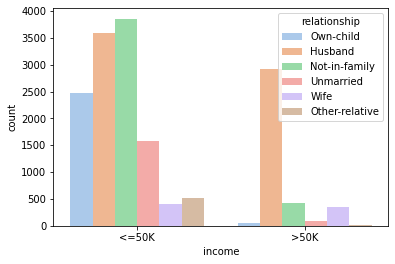

In [8]:
import warnings
warnings.filterwarnings("ignore")

sns.countplot(dataset['income'], palette='pastel', hue='relationship', data=dataset);

In [9]:
dataset['education'].value_counts()

HS-grad         5283
Some-college    3587
Bachelors       2670
Masters          934
Assoc-voc        679
11th             637
Assoc-acdm       534
10th             456
7th-8th          309
Prof-school      258
9th              242
12th             224
Doctorate        181
5th-6th          176
1st-4th           79
Preschool         32
Name: education, dtype: int64

In [10]:
dataset['workclass'] = dataset['workclass'].replace('?', 'Private')

dataset['occupation'] = dataset['occupation'].replace('?', 'Prof-specialty')

dataset['native-country'] = dataset['native-country'].replace('?', 'United-States')

dataset.head(8)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K


In [11]:
# Here we are replacing the exact values with more broad and simpler categories.
dataset.education= dataset.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')

dataset.education = dataset.education.replace('Masters', 'grad')

dataset.education = dataset.education.replace('HS-grad', 'high school')

dataset.education = dataset.education.replace('Bachelors', 'undergrad')

dataset.education = dataset.education.replace('Doctorate', 'doc')

dataset.education = dataset.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')

#Here we are also categorizing marital status into simpler categories.
dataset['marital-status']= dataset['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')

dataset['marital-status']= dataset['marital-status'].replace(['Never-married'], 'not-married')

dataset['marital-status']= dataset['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [12]:
# Here we are setting the values of '<=50k' and '>50k' to 0 and 1, respectfully.

dataset.income = dataset.income.replace('<=50K', 0)

dataset.income = dataset.income.replace('>50K', 1)

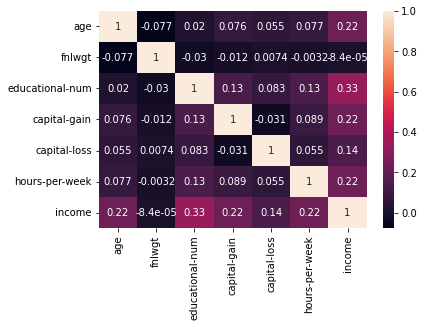

In [13]:
sns.heatmap(dataset.corr(), annot=True);

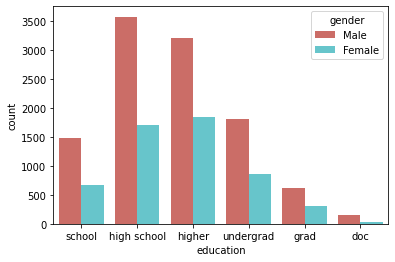

In [14]:
sns.countplot(dataset['education'], hue='gender', data=dataset, palette='hls');

In [15]:
px.pie(dataset, values='educational-num', names='education', title='% of edu', 
      color_discrete_sequence = px.colors.qualitative.Vivid)

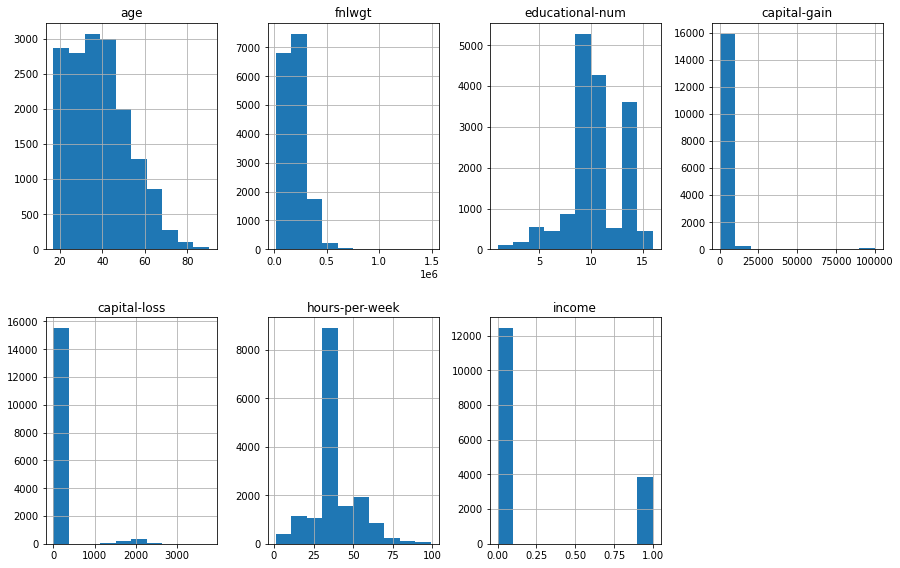

In [16]:
dataset.hist(figsize=(15,15), layout=(3,4), sharex=False);

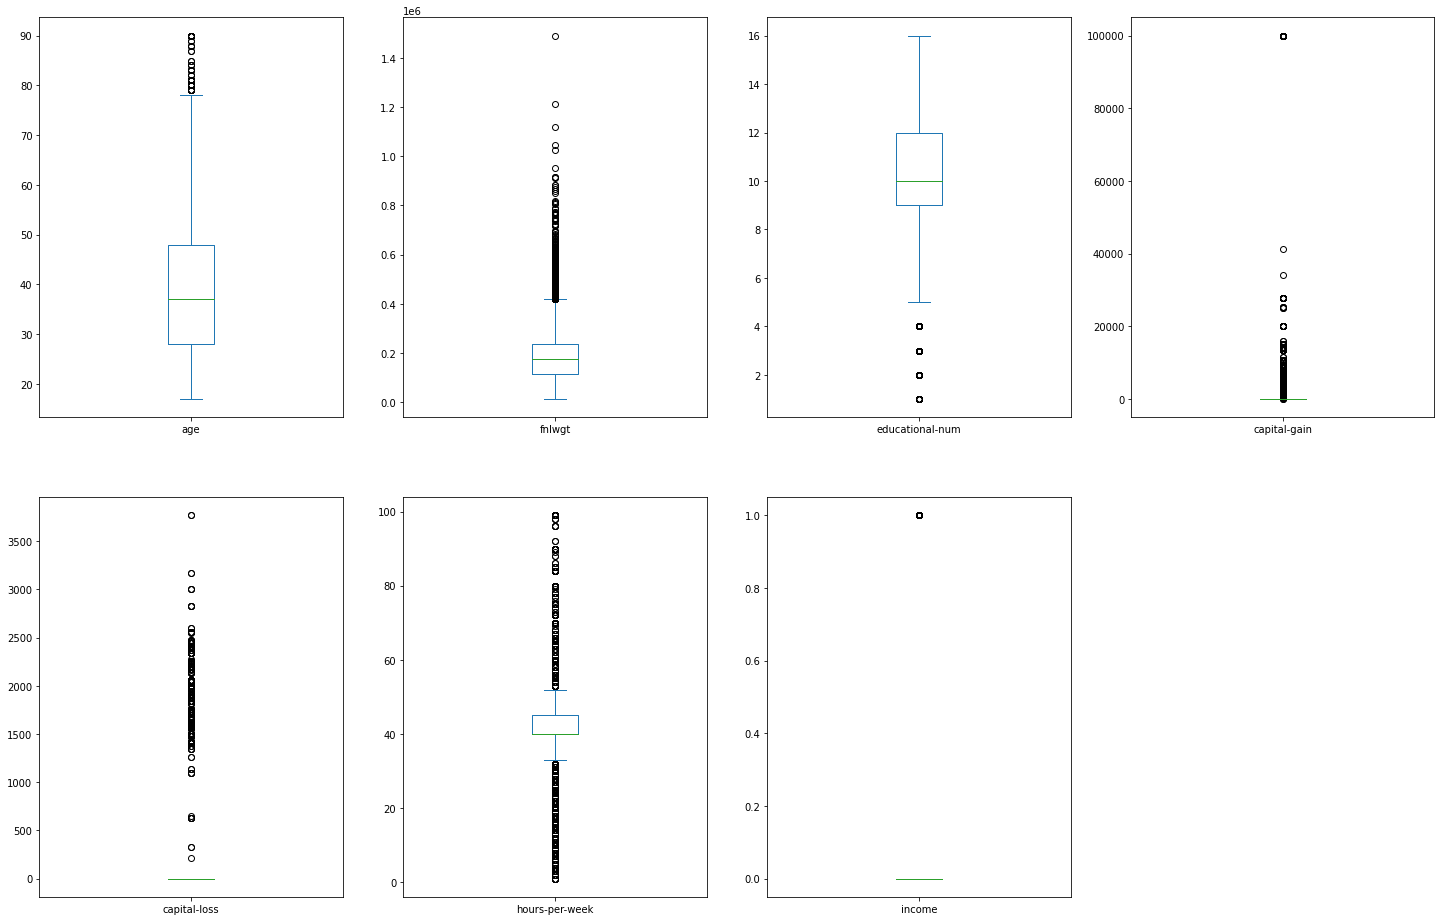

In [17]:
dataset.plot(kind='box', figsize=(25,25), layout=(3,4), sharex=False, subplots=True);

In [18]:
X= dataset.drop(['income'], axis=1)
y = dataset['income']

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

dataset1= dataset.copy()
dataset1= dataset1.apply(LabelEncoder().fit_transform)

ss= StandardScaler().fit(dataset1.drop('income', axis=1))

In [20]:
X= ss.transform(dataset1.drop('income', axis=1))
y= dataset['income']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)


print("Training Data Accuracy: {:,.3f}".format(lr.score(X_train, y_train)))

print("Test Data Accuracy: {:,.3f}".format(lr.score(X_test, y_test)))

Training Data Accuracy: 0.838
Test Data Accuracy: 0.841


In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)


print("Training Data Accuracy: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Test Data Accuracy: {:,.3f}".format(rfc.score(X_test, y_test)))

Training Data Accuracy: 1.000
Test Data Accuracy: 0.852


In [24]:
print(confusion_matrix(y_test, prediction1))

[[3448  278]
 [ 443  716]]


In [25]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3726
           1       0.72      0.62      0.67      1159

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



In [26]:
# Here we are creating the random forest instance and
# method in order to use ensemble()

def rforest(X_train, y_train, X_test):

    rforest = BaggingClassifier(base_estimator = RandomForestClassifier(n_estimators = 90))
    
    rforest.fit(X_train, y_train)
    
    y_pred = rforest.predict(X_test)
    
    return y_pred

In [27]:
# Here we are creating the logistic regression instance and
# method in order to use ensemble()

def lreg(X_train, y_train, X_test):
    
    lreg = BaggingClassifier(base_estimator = LogisticRegression())
    
    lreg.fit(X_train,y_train)
    
    y_pred = lreg.predict(X_test)
    
    return y_pred

In [28]:
# Here we are creating the naive bayes instance and
# method in order to use ensemble()

def nbayes(X_train, y_train, X_test):
    
    nbayes = BaggingClassifier(base_estimator = GaussianNB())
    
    nbayes.fit(X_train,y_train)
    
    y_pred = nbayes.predict(X_test)
    
    return y_pred

In [29]:
from sklearn.ensemble import BaggingClassifier


def ensemble(X_train, y_train, X_test):
    ranF = rforest(X_train, y_train, X_test)
    logR = lreg(X_train, y_train, X_test)
    naiB = nbayes(X_train, y_train, X_test)
    
    finalE = []
    
    for i in range (len(X_test)):
        finalE.append(stats.mode([ranF[i], logR[i], naiB[i]])[0][0])
    
    return finalE

In [30]:
trial_run = ensemble(X_train, y_train, X_test)

In [31]:
for i in range(4):
    print(['tn', 'fp', 'fn', 'tp'][i],confusion_matrix(trial_run, y_test).ravel()[i])

tn 3499
fp 514
fn 227
tp 645


In [32]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3726
           1       0.72      0.62      0.67      1159

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



In [33]:
# Using the precision formula and function: tp/tp+fp
print("Precision Score = ", precision_score(trial_run, y_test))

# Using the recall formula and function= tp/tp+fn
print("Recall Score = ", recall_score(trial_run, y_test))

# Using F1 Score function
print("F1 Score = ", f1_score(trial_run, y_test))

# Using Accuracy Score function
print("Accuracy Score = ", accuracy_score(trial_run, y_test))

Precision Score =  0.5565142364106989
Recall Score =  0.7396788990825688
F1 Score =  0.6351550960118169
Accuracy Score =  0.8483111566018424
